In [1]:
pwd

'C:\\Users\\Sneha\\mywork\\tsa_cou_fol'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Data/starbucks.csv', index_col='Date', parse_dates=True)

In [4]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [5]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

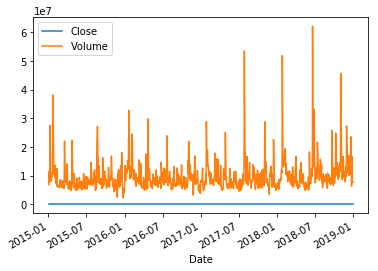

In [6]:
#both columns have tremendously different scales ie why Close is a flat line

#coz close values are 0 wrt volume values that are in millions

df.plot()

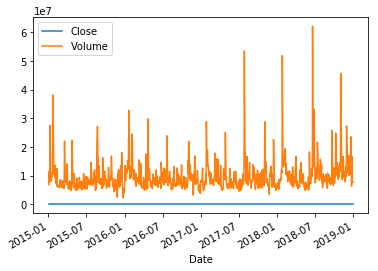

In [8]:
# plotting single column

df[['Close', 'Volume']].plot();

to get rid of '<matplotlib.axes._subplots.AxesSubplot at 0x232e7e86828>' </i> use ; at the end 

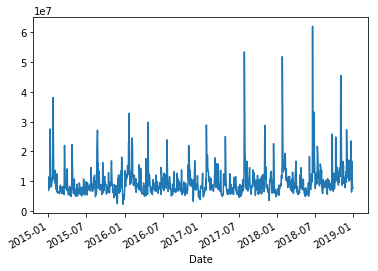

In [12]:
df['Volume'].plot();

# 1e7 means 10 raised to power 7

In [13]:
title = 'title you want'
ylabel = 'label for y'
xlabel = 'label for x'

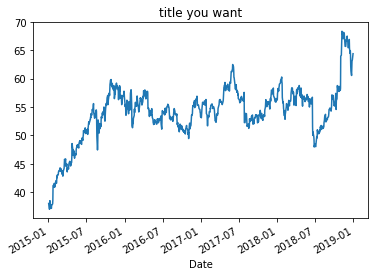

In [14]:
#inserting title in our plot

df['Close'].plot(title=title);

for y and x labels you need to assign the above code to a variable and then call <b>set() </b>method on that variable specifying the repective labels.

you can also autoscale the axes by using <b>autoscale() before using set method</b>. by default, it scales both the axes. <i>tight=True</i> ends the plot just at the last/max values along both axes, no whitespace.

[Text(0, 0.5, 'label for y'), Text(0.5, 0, 'label for x')]

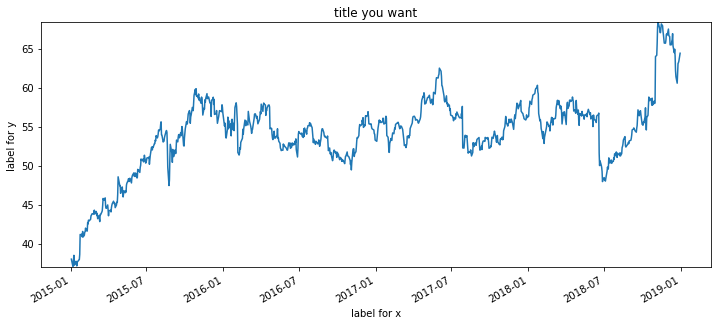

In [36]:
_ = df['Close'].plot(title=title, figsize=(12,5))

_.autoscale(axis='y', tight=True)

_.set(xlabel=xlabel, ylabel=ylabel)

there are two ways to set a span of time as an x-axis limit :
1. edit on the dataframe side : by slicing the column series
2. edit on the plotting side : using 'xlim= [start , enddate]' inside plot()

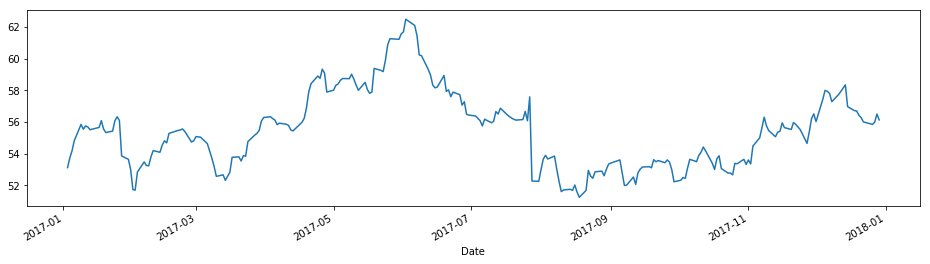

In [30]:
# 1.
#plotting only the year 2017 data

df['Close']['2017'].plot(figsize=(16,4));

#or use slice '2017-01-01 : 2017-12-31' on Close series

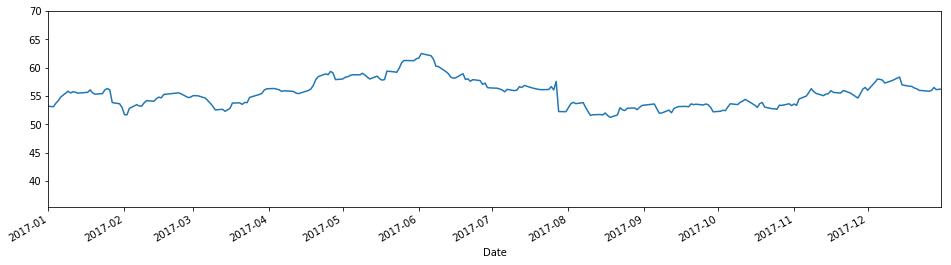

In [31]:
# 2.
#plotting 2017 using xlim slice

df['Close'].plot(figsize=(16,4), xlim=['2017-01-01', '2017-12-31']);

#its a , between the start and end not slice operator. 

we're getting different plots as you can see tho. why?

coz plot method rescales xaxis and yaxis

> you can also scale y values by using 'ylim=[start, end]' in the plot()

you can see that changing y scale largely changes the plots for the same data.

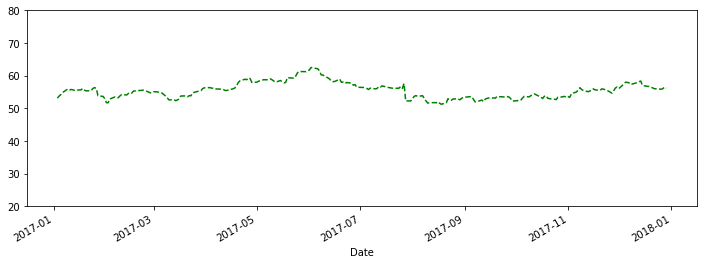

In [34]:
#using method 1

df['Close']['2017'].plot(figsize=(12,4), ylim=[20,80], ls='--', c='green');

#### specifcs for datetime index objects :

In [9]:
from matplotlib import dates

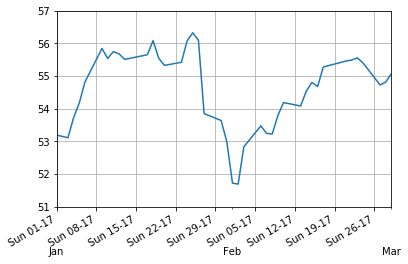

In [23]:
_ = df['Close'].plot(xlim=['2017-01-01', '2017-03-01'], ylim=[51,57])

#resetting pandas default Date label
_.set(xlabel='')

#set the tick locator and formatter for major axis
_.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=6)) #sunday = 6

#setting xtick formatting style on plot 
_.xaxis.set_major_formatter(dates.DateFormatter('%a %d-%y'))

#minor
_.xaxis.set_minor_locator(dates.MonthLocator()) #default january

_.xaxis.set_minor_formatter(dates.DateFormatter('\n\n\n%b'))  #month = %b


#setting grid simple af
_.yaxis.grid(True)
_.xaxis.grid(True)